In [ ]:
# imprt necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [68]:
# read in the data
df_gen = pd.read_excel('Data/SMARD/Actual_generation_201501010000_202601010000_Day.xlsx', header=9)
# read in the consumption data
df_con = pd.read_excel('Data/SMARD/Actual_consumption_201501010000_202601010000_Day.xlsx', header=9)

e:\Documents\Business\Energy\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
e:\Documents\Business\Energy\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
e:\Documents\Business\Energy\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [69]:
df_con

,Start date,End date,grid load [MWh],Grid load incl. hydro pumped storage [MWh],Hydro pumped storage [MWh],Residual load [MWh]
0,"Jan 1, 2015","Jan 2, 2015",1096852.75,1122748.25,25895.5,768472.25
1,"Jan 2, 2015","Jan 3, 2015",1288914.75,1316139.75,27225,679205.75
2,"Jan 3, 2015","Jan 4, 2015",1213309.5,1238003.75,24694.25,736911.75
3,"Jan 4, 2015","Jan 5, 2015",1177896,1202337.75,24441.75,767345.5
4,"Jan 5, 2015","Jan 6, 2015",1425927.5,1451660.75,25733.25,1172036.25
...,...,...,...,...,...,...
4013,"Dec 27, 2025","Dec 28, 2025",-,-,-,-
4014,"Dec 28, 2025","Dec 29, 2025",-,-,-,-
4015,"Dec 29, 2025","Dec 30, 2025",-,-,-,-
4016,"Dec 30, 2025","Dec 31, 2025",-,-,-,-


In [70]:
# set the index to the Start date
df_con = df_con.set_index(df_con["Start date"])

In [71]:
# drop the unnecessary columns
df_con.drop(columns=["Start date", "End date"], inplace=True)

In [55]:
# last few rows of the consumption data are empty, check for null values
df_con.isnull().sum()

grid load [MWh]                               0
Grid load incl. hydro pumped storage [MWh]    0
Hydro pumped storage [MWh]                    0
Residual load [MWh]                           0
dtype: int64

In [72]:
# Drop empty rows where a condition is False, as the empty rows contain only "-"
# Example: keep only rows where all columns are not equal to "-"
df_con_bool = (df_con != "-").all(axis=1)
df_con_filtered = df_con[df_con_bool]

In [73]:
df_con_filtered

,grid load [MWh],Grid load incl. hydro pumped storage [MWh],Hydro pumped storage [MWh],Residual load [MWh]
Start date,,,,
"Jan 1, 2015",1096852.75,1122748.25,25895.5,768472.25
"Jan 2, 2015",1288914.75,1316139.75,27225,679205.75
"Jan 3, 2015",1213309.5,1238003.75,24694.25,736911.75
"Jan 4, 2015",1177896,1202337.75,24441.75,767345.5
"Jan 5, 2015",1425927.5,1451660.75,25733.25,1172036.25
...,...,...,...,...
"May 11, 2025",948595.25,994259.75,45664.5,316743.5
"May 12, 2025",1211699.25,1248799.75,37100.5,412159.75
"May 13, 2025",1240242,1272550.75,32308.75,630569.25


In [74]:
df_con_filtered.describe()

,grid load [MWh],Grid load incl. hydro pumped storage [MWh],Hydro pumped storage [MWh],Residual load [MWh]
count,3788,3788.0,3788.0,3788.00
unique,3784,3783.0,3742.0,3787.00
top,1224080,1581840.5,35252.5,706482.75
freq,2,2.0,3.0,2.00


In [75]:
# values appear to be strings, convert to numeric
df_con_filtered = df_con_filtered.apply(pd.to_numeric, errors='coerce')

In [76]:
df_con_filtered.describe()

,grid load [MWh],Grid load incl. hydro pumped storage [MWh],Hydro pumped storage [MWh],Residual load [MWh]
count,3.788000e+03,3.788000e+03,3788.000000,3.788000e+03
mean,1.343404e+06,1.374193e+06,30788.558508,9.042549e+05
std,1.628774e+05,1.606291e+05,10670.150404,2.658605e+05
min,8.647180e+05,9.064995e+05,5907.500000,9.333450e+04
25%,1.229993e+06,1.263496e+06,22669.312500,7.256690e+05
50%,1.364694e+06,1.389762e+06,29566.875000,9.139720e+05
75%,1.460077e+06,1.490573e+06,37485.375000,1.096730e+06
max,1.729547e+06,1.767122e+06,70895.250000,1.627714e+06


In [77]:
# repeat the same for the generation data
df_gen = df_gen.set_index(df_gen["Start date"])
# drop the unnecessary columns
df_gen.drop(columns=["Start date", "End date"], inplace=True)
# Drop empty rows where a condition is False, as the empty rows contain only "-"
df_gen_bool = (df_gen != "-").all(axis=1)
df_gen_filtered = df_gen[df_gen_bool]
# convert to numeric
df_gen_filtered = df_gen_filtered.apply(pd.to_numeric, errors='coerce')
# check the data
df_gen_filtered.describe()



,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
count,3316.000000,3316.000000,3316.000000,3.316000e+03,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000
mean,105758.825995,42061.948206,55206.582027,2.520407e+05,118468.607961,3870.831273,164535.250754,299710.109545,163008.959364,118384.582102,25771.623040,58060.918878
std,6940.865622,9846.324483,37844.585572,1.943874e+05,80989.672152,961.541365,71440.438895,86002.994832,95434.064156,71185.272198,7546.134573,47809.743457
min,85271.750000,22086.250000,171.500000,1.038375e+04,4906.250000,1408.250000,0.000000,74794.500000,23040.250000,14330.250000,6517.500000,14487.250000
25%,100938.375000,34377.875000,22158.062500,1.073968e+05,42346.437500,3111.062500,132212.812500,249640.687500,77657.625000,61216.437500,20559.500000,32717.312500
50%,106430.375000,41122.875000,50388.750000,1.929285e+05,111421.875000,3842.875000,185093.625000,316807.750000,147550.000000,103354.000000,25845.000000,37492.500000
75%,110856.125000,48995.687500,83771.312500,3.470718e+05,178859.687500,4621.562500,216836.312500,365105.500000,238833.875000,164372.000000,30797.125000,47540.625000
max,119807.250000,72365.250000,156696.750000,1.044918e+06,366966.250000,6207.000000,274628.500000,469374.750000,426636.500000,378974.500000,61197.750000,491341.000000


In [91]:
df_con_filtered

,grid load [MWh],Grid load incl. hydro pumped storage [MWh],Hydro pumped storage [MWh],Residual load [MWh],grid load
Start date,,,,,
"Jan 1, 2015",6027937.5,1122748.25,25895.50,768472.25,3013968.75
"Jan 2, 2015",6622970.5,1316139.75,27225.00,679205.75,3311485.25
"Jan 3, 2015",6425838.5,1238003.75,24694.25,736911.75,3212919.25
"Jan 4, 2015",6344042.0,1202337.75,24441.75,767345.50,3172021.00
"Jan 5, 2015",8150715.5,1451660.75,25733.25,1172036.25,4075357.75
...,...,...,...,...,...
"May 11, 2025",4610526.0,994259.75,45664.50,316743.50,2305263.00
"May 12, 2025",5819518.5,1248799.75,37100.50,412159.75,2909759.25
"May 13, 2025",6351341.5,1272550.75,32308.75,630569.25,3175670.75


In [78]:
# get the start and end dates for the generation data after filtering
start_date = df_gen_filtered.index.min()
end_date = df_gen_filtered.index.max()
print(f"Data range: {start_date} to {end_date}")

Data range: Apr 1, 2015 to Sep 9, 2023


In [79]:
# repeat the same for the consumption data
start_date_con = df_con_filtered.index.min()    
end_date_con = df_con_filtered.index.max()
print(f"Data range: {start_date_con} to {end_date_con}")

Data range: Apr 1, 2015 to Sep 9, 2024


<Axes: title={'center': 'Consumption Data'}, xlabel='Date', ylabel='Consumption (MW)'>

<Figure size 1500x800 with 0 Axes>

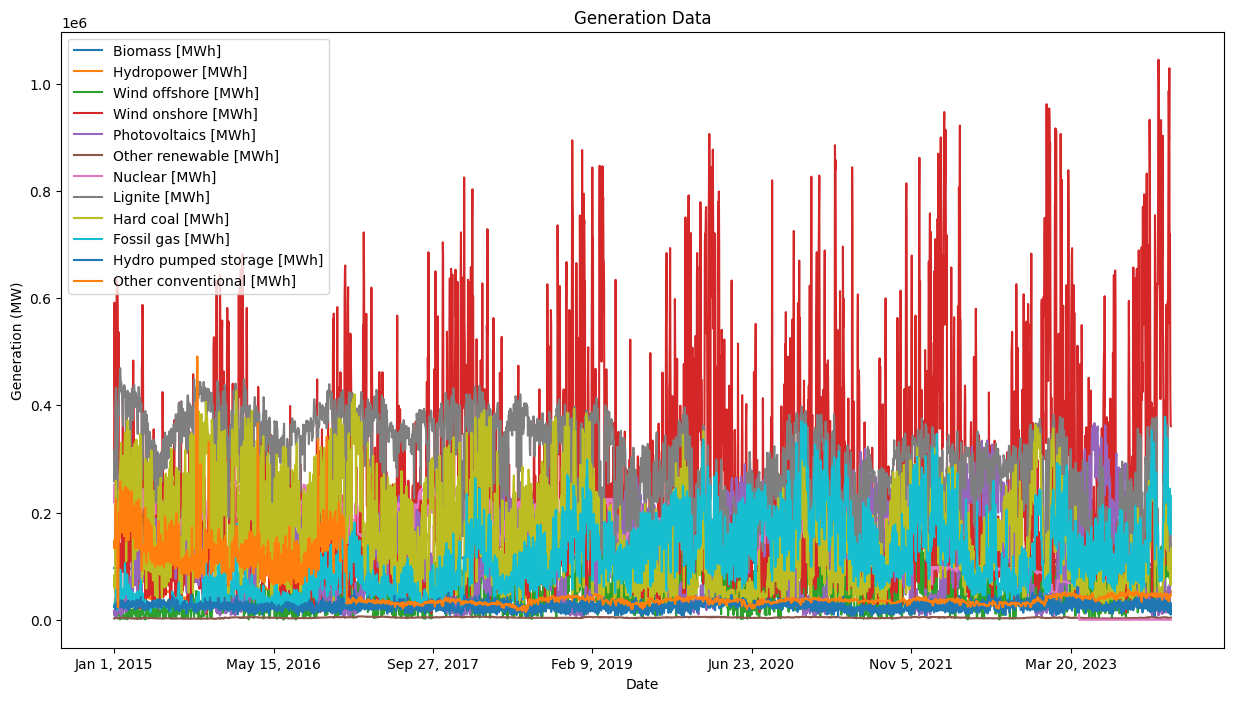

<Figure size 1500x800 with 0 Axes>

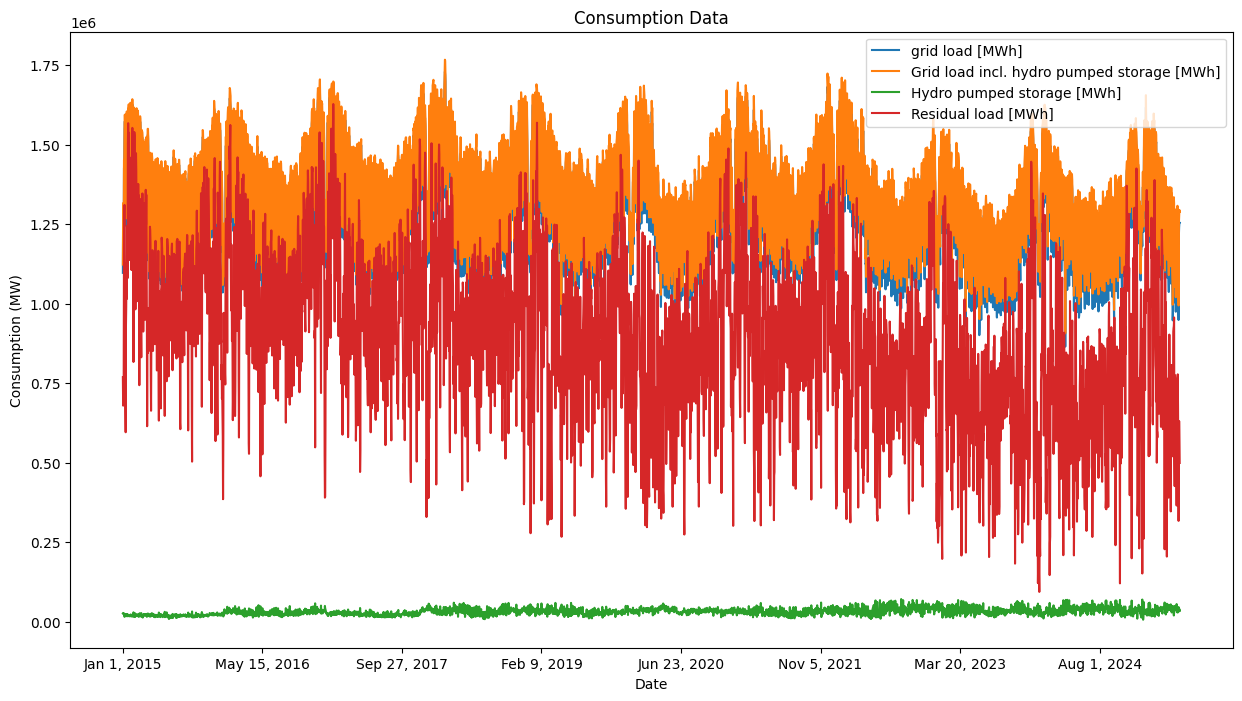

In [81]:
# plot the generation data 
plt.figure(figsize=(15, 8))
df_gen_filtered.plot(title="Generation Data", xlabel="Date", ylabel="Generation (MW)", figsize=(15, 8))
# plot the consumption data
plt.figure(figsize=(15, 8))
df_con_filtered.plot(title="Consumption Data", xlabel="Date", ylabel="Consumption (MW)", figsize=(15, 8))


<Figure size 1500x800 with 0 Axes>

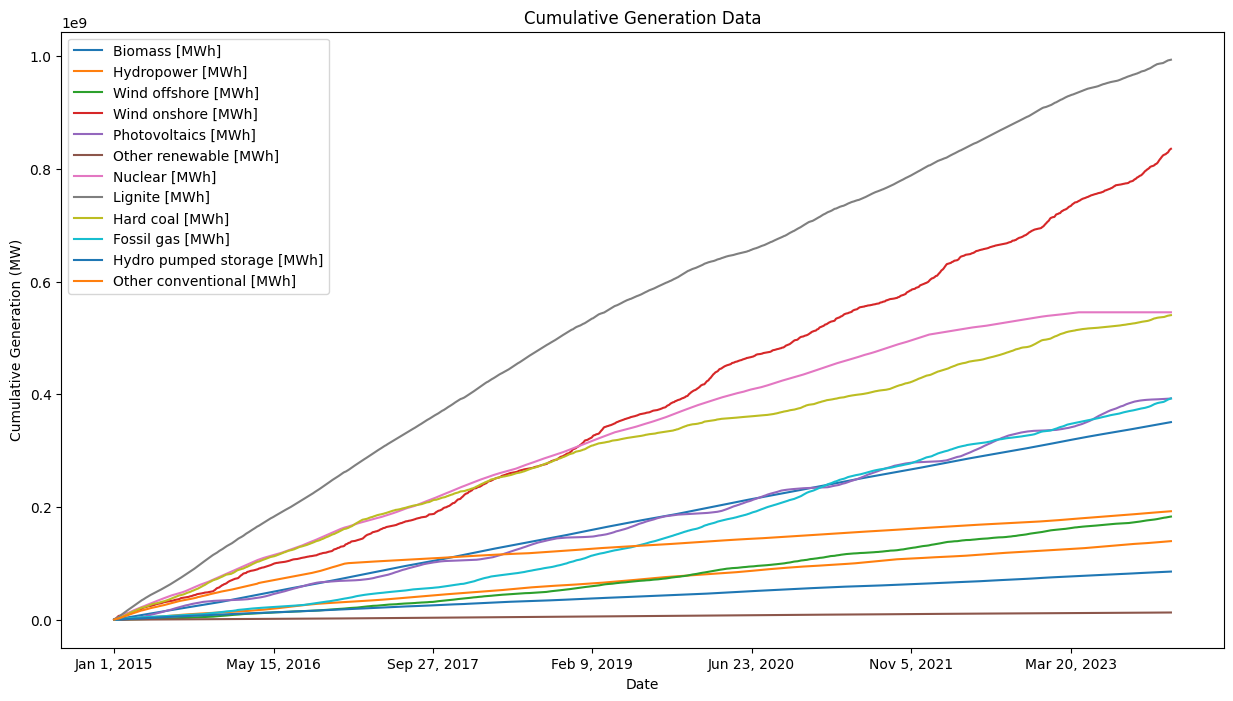

<Figure size 1500x800 with 0 Axes>

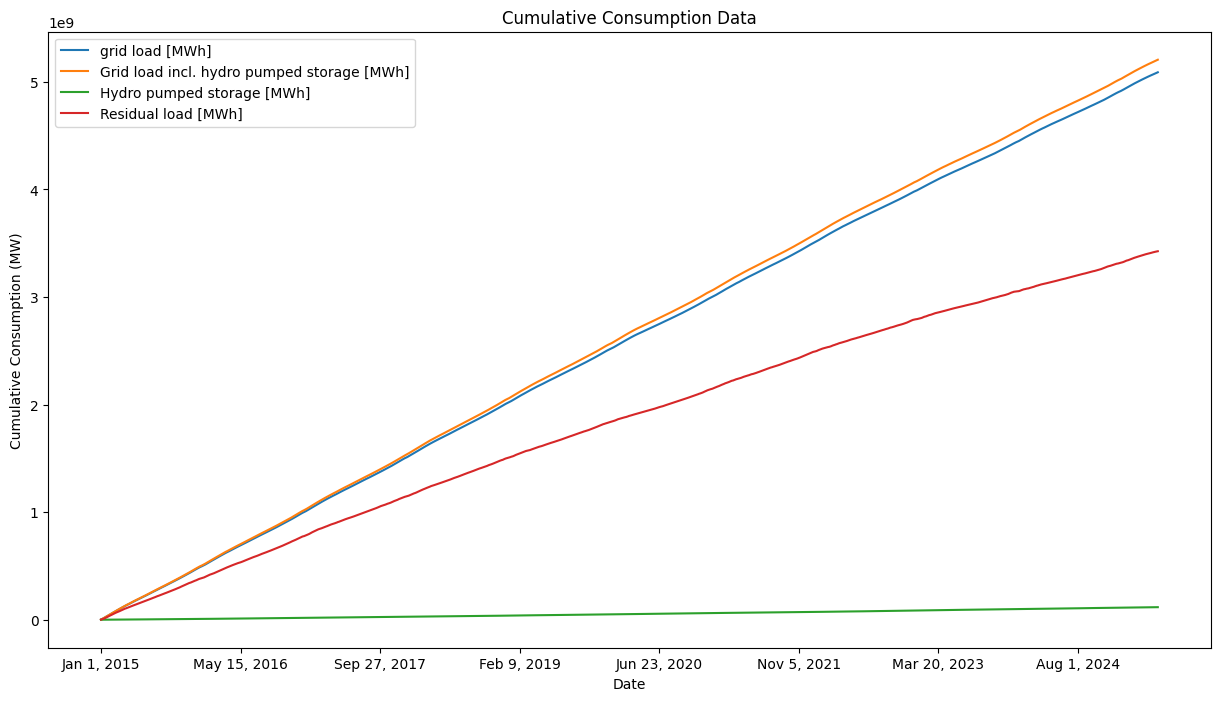

<Figure size 1500x800 with 0 Axes>

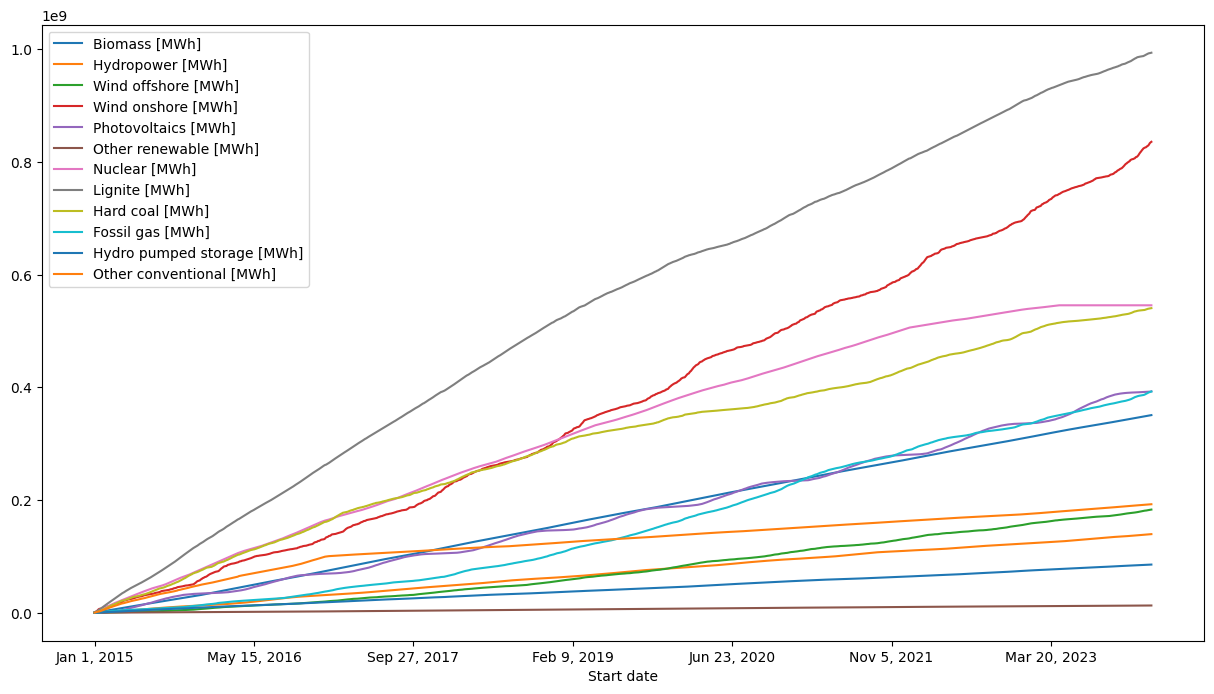

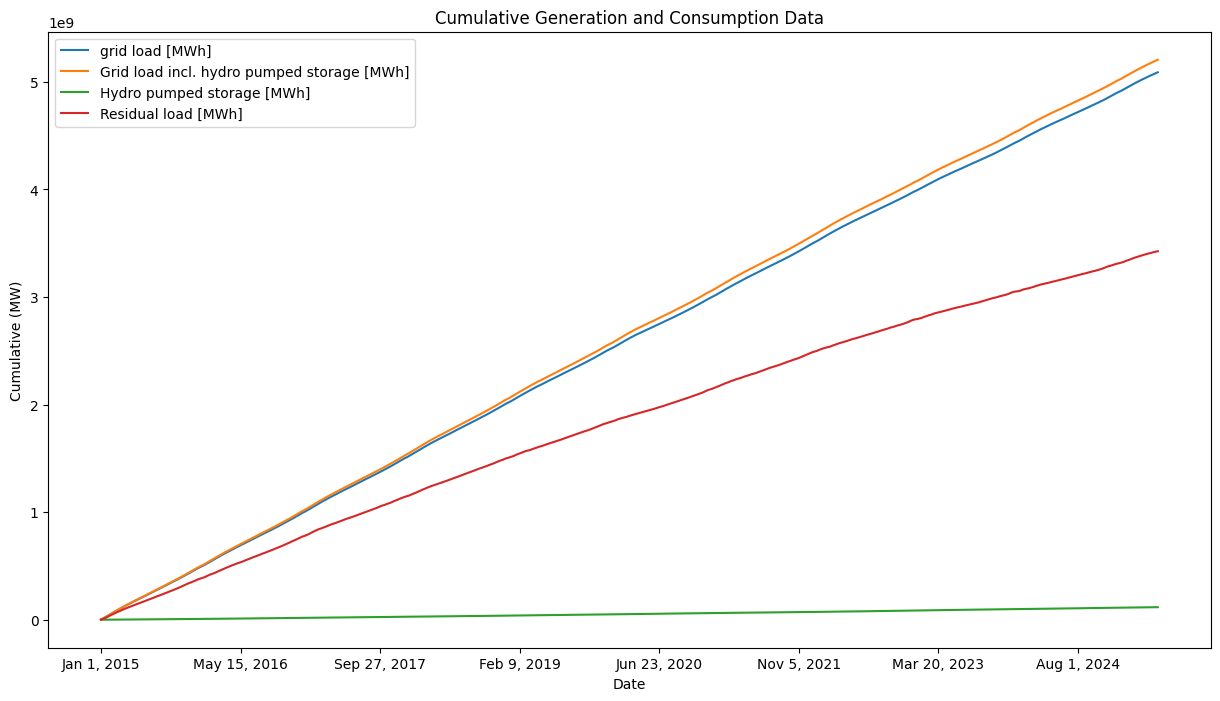

In [ ]:

plt.figure(figsize=(15, 8))
df_gen_filtered.cumsum().plot(title="Cumulative Generation Data", xlabel="Date", ylabel="Cumulative Generation (MW)", figsize=(15, 8))
plt.figure(figsize=(15, 8))
df_con_filtered.cumsum().plot(title="Cumulative Consumption Data", xlabel="Date", ylabel="Cumulative Consumption (MW)", figsize=(15, 8))
# Plot the cumulative sum of the generation and consumption data together
plt.figure(figsize=(15, 8))
df_gen_filtered.cumsum().plot(label="Cumulative Generation", figsize=(15, 8))
df_con_filtered.cumsum().plot(label="Cumulative Consumption", figsize=(15, 8))
plt.title("Cumulative Generation and Consumption Data")
plt.xlabel("Date")
plt.ylabel("Cumulative (MW)")
plt.legend()

In [85]:
# get the generated power each day
df_gen_filtered['Total Generation'] = df_gen_filtered.sum(axis=1)

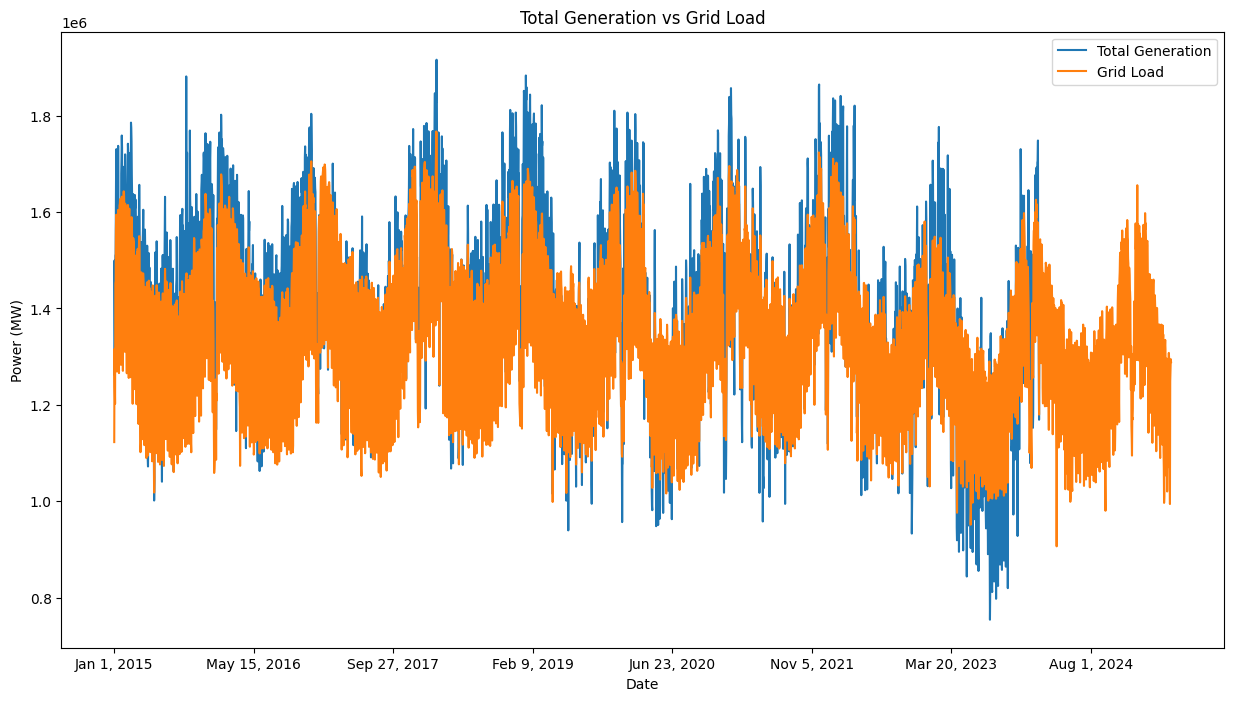

In [93]:
# plot the total generation data and the grid load 
plt.figure(figsize=(15, 8))
df_gen_filtered['Total Generation'].plot(label='Total Generation', figsize=(15, 8))
df_con_filtered['Grid load incl. hydro pumped storage [MWh]'].plot(label='Grid Load', figsize=(15, 8))
plt.title("Total Generation vs Grid Load")
plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.legend()

# How to Add a GitHub Repo in VSCode

1. Open VSCode.
2. Open the Command Palette (`Ctrl+Shift+P` or `Cmd+Shift+P`).
3. Type `Git: Clone` and select it.
4. Paste the GitHub repository URL and press Enter.
5. Choose a local folder for the clone.
6. When prompted, open the cloned repository in VSCode.

You can now work with the repository directly in VSCode.